In [1]:
!pip install nibabel
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import torch
import os

In [2]:
tensor = torch.load('/scratch-shared/abujalancegome/CMR_data/cmr_processing_metadata.pt')
print(tensor)

{'total_images': 39248, 'batches': 785, 'batch_size': 50, 'max_height': 85, 'max_width': 92, 'half_precision': True}


In [2]:
tensor = torch.load('/scratch-shared/abujalancegome/CMR_data/cmr_batch_784.pt')
tensor = tensor.unsqueeze(1)
print(tensor.shape)

torch.Size([48, 1, 50, 85, 92])


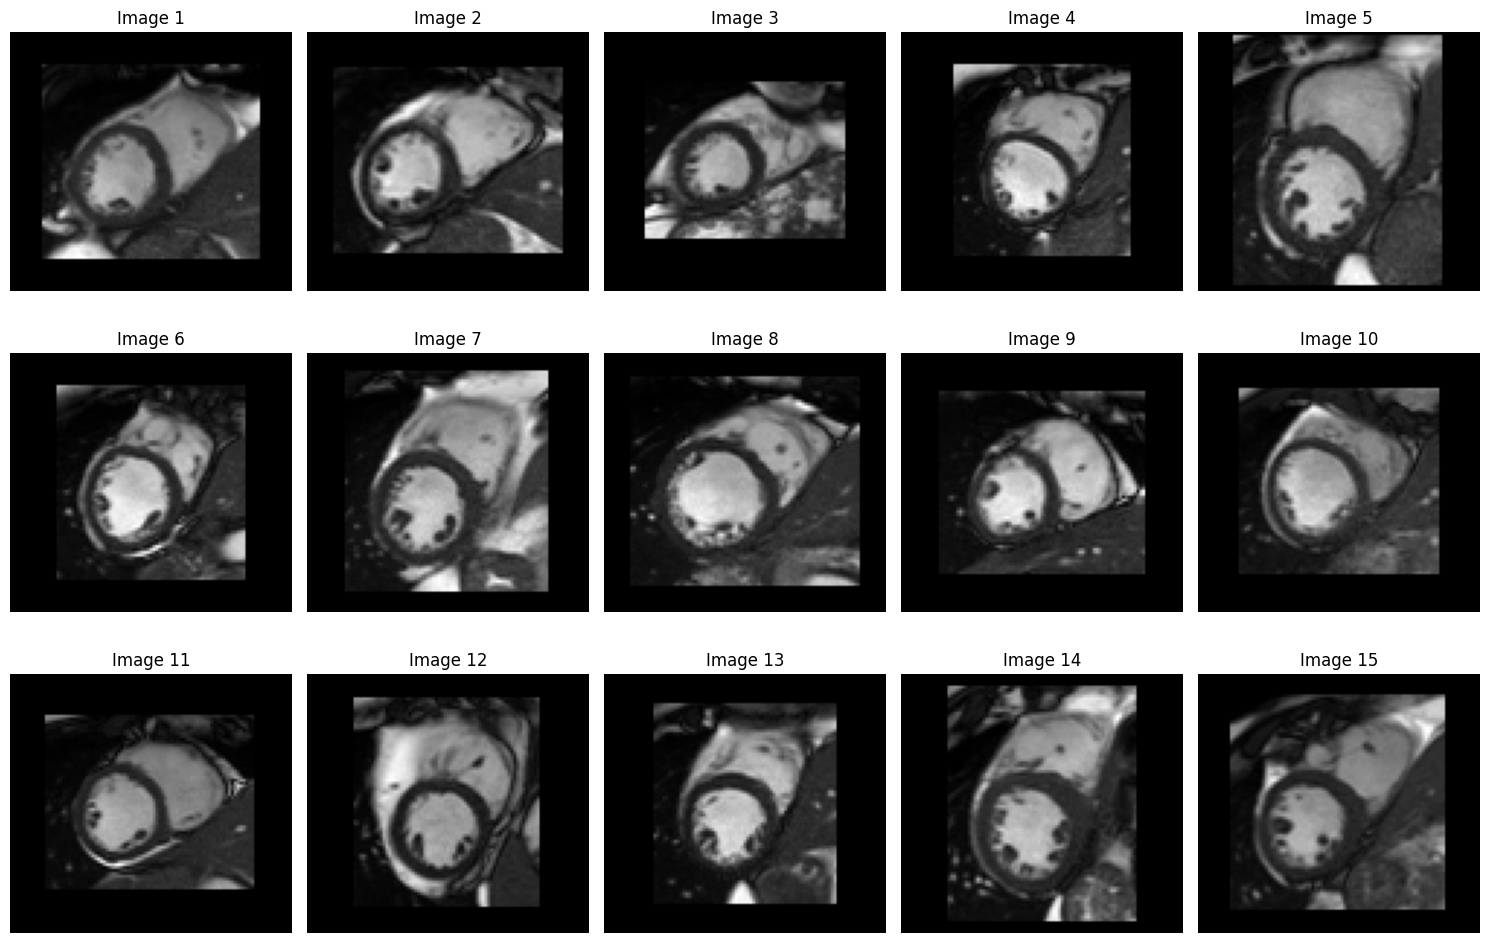

In [4]:
# Convert tensor to numpy & plot the first 10 images
fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # 2 rows, 5 columns

for i, ax in enumerate(axes.flat):
    img = tensor[i, 0].cpu().numpy()  # Convert to numpy (shape: 231x228)
    ax.imshow(img, cmap='gray')  # Display as grayscale
    ax.axis('off')  # Hide axes
    ax.set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()

torch.Size([50, 1, 85, 92])
torch.float16


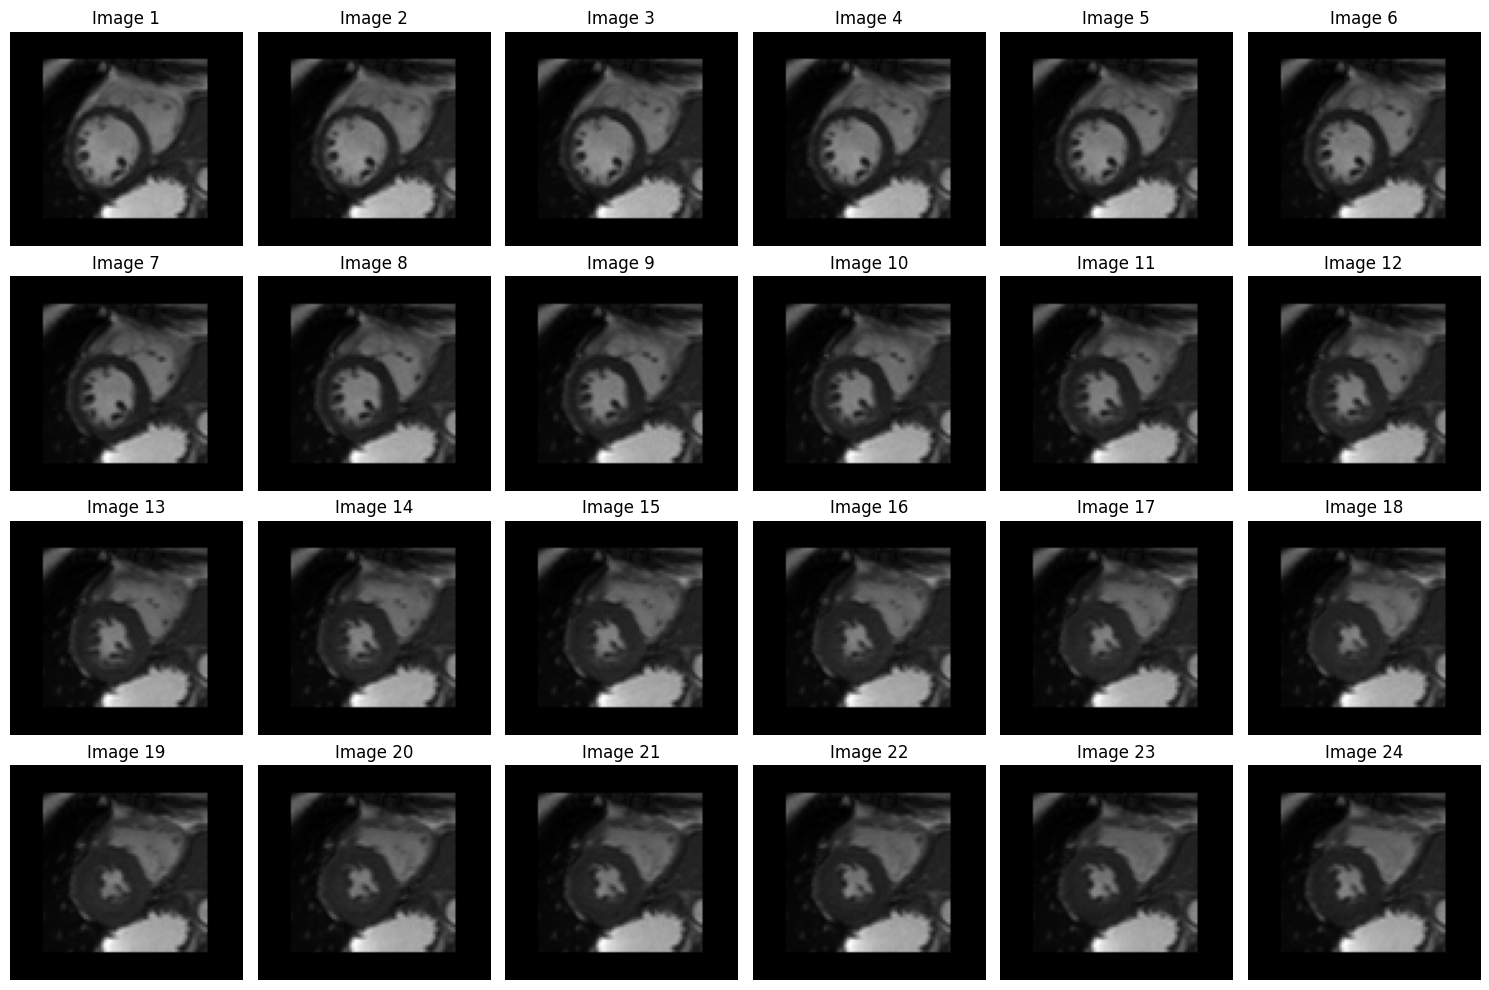

In [3]:
tensor = torch.load('/scratch-shared/abujalancegome/CMR_data/cmr_batch_784.pt')[3]
tensor = tensor.unsqueeze(1)
print(tensor.shape)
print(tensor.dtype)

# Convert tensor to numpy & plot the first 10 images
fig, axes = plt.subplots(4, 6, figsize=(15, 10))  # 2 rows, 5 columns

for i, ax in enumerate(axes.flat):
    img = tensor[i, 0].cpu().numpy()  # Convert to numpy (shape: 231x228)
    ax.imshow(img, cmap='gray')  # Display as grayscale
    ax.axis('off')  # Hide axes
    ax.set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()


# torch.save(tensor, '/scratch-shared/abujalancegome/CMR_data/cmr_batch_0.pt')


torch.Size([50, 94, 86])
torch.float16


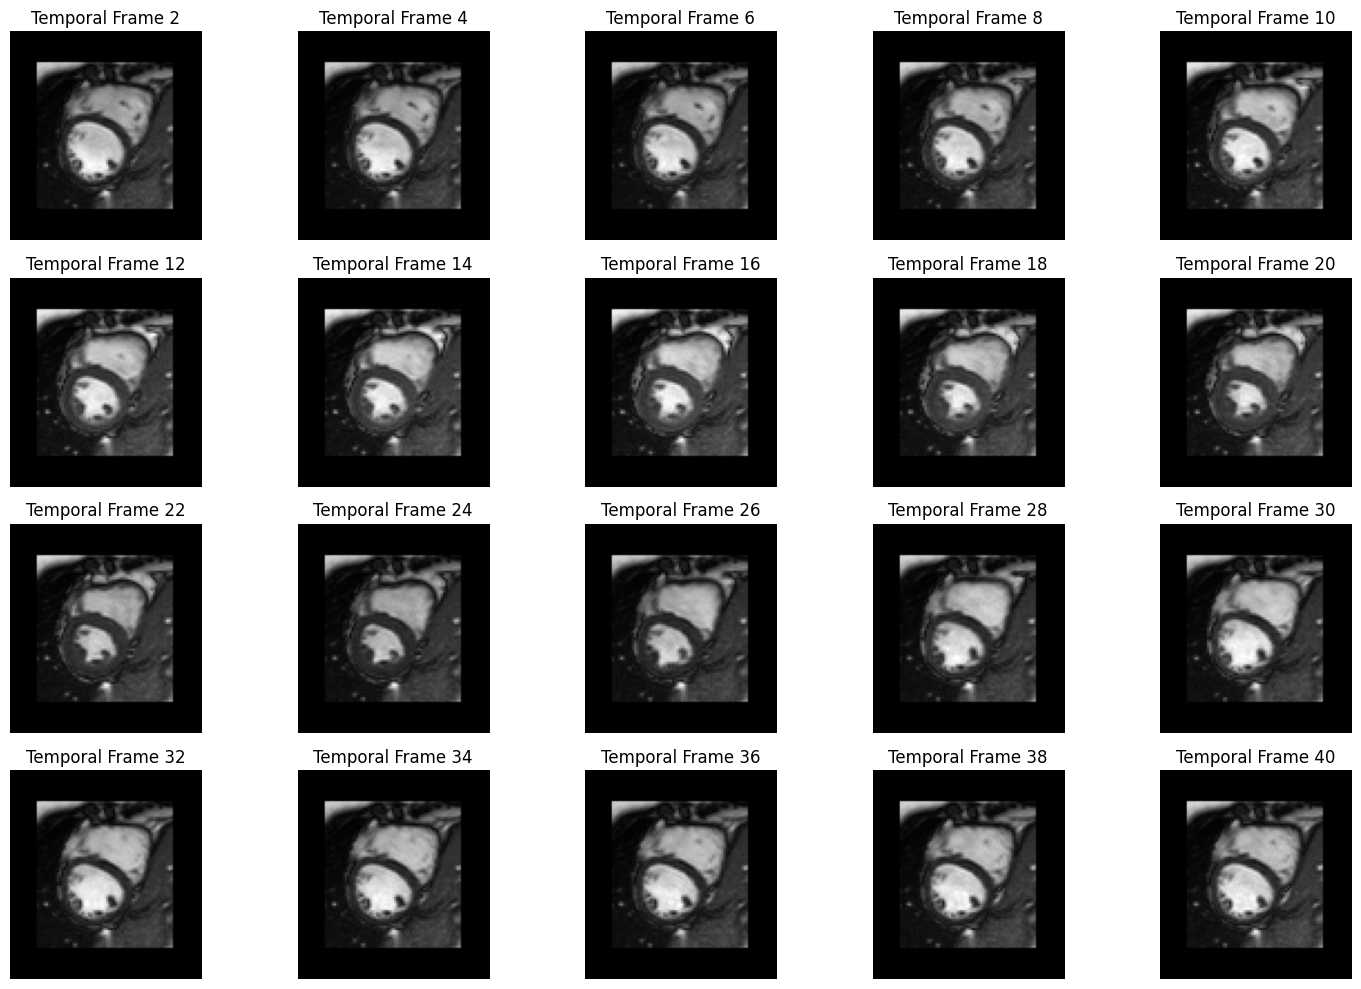

In [6]:
tensor = torch.load('/scratch-shared/abujalancegome/CMR_data/cmr_batch_0.pt')[3]

#tensor = tensor.unsqueeze(1)
# tensor = tensor.permute(0, 3, 1, 2) #[0, :, :, :]
print(tensor.shape)
print(tensor.dtype)

# Convert tensor to numpy & plot the first 10 images
fig, axes = plt.subplots(4, 5, figsize=(15, 10))  # 2 rows, 5 columns

for i, ax in enumerate(axes.flat):
    img = tensor[(i+1)*2].cpu().numpy()  # Convert to numpy (shape: 231x228)
    ax.imshow(img, cmap='gray')  # Display as grayscale
    ax.axis('off')  # Hide axes
    ax.set_title(f"Temporal Frame {(i+1)*2}")

plt.tight_layout()
plt.show()

torch.Size([50, 1, 90, 89])
torch.float16


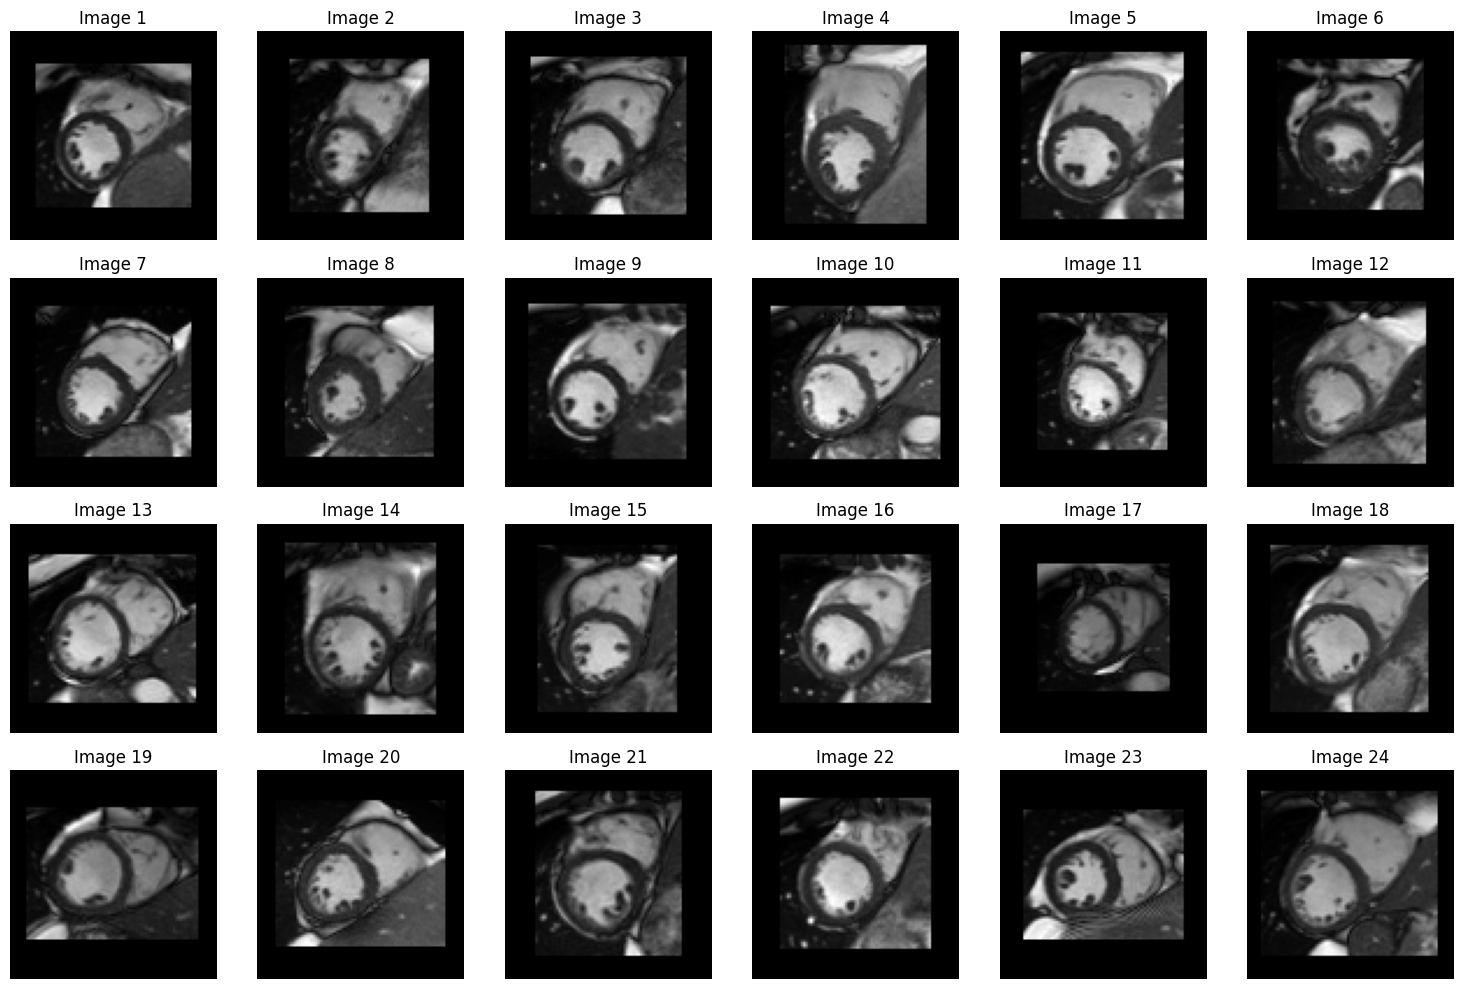

In [29]:
tensor = torch.load('/scratch-shared/abujalancegome/CMR_data/cmr_batch_19.pt')

tensor = tensor.unsqueeze(1)
print(tensor.shape)
print(tensor.dtype)

# Convert tensor to numpy & plot the first 10 images
fig, axes = plt.subplots(4, 6, figsize=(15, 10))  # 2 rows, 5 columns

for i, ax in enumerate(axes.flat):
    img = tensor[i, 0].cpu().numpy()  # Convert to numpy (shape: 231x228)
    ax.imshow(img, cmap='gray')  # Display as grayscale
    ax.axis('off')  # Hide axes
    ax.set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()

In [2]:
def plot_image(file_path):
    # Load the .nii.gz file
    #file_path = '/home/abujalancegome/deep_risk/ukbb_cardiac/demo_image/2/la_2ch_ED.nii.gz'
    img = nib.load(file_path)

    # Get the image data as a numpy array
    data = img.get_fdata()

    # Print the shape of the data
    print("Image shape:", data.shape)

    # Display a single slice of the image
    # For 3D images, you need to select a slice along one of the axes
    slice_index = data.shape[2] // 2  # Middle slice along the third axis
    slice_data = data[:, :, slice_index]

    # Plot the slice
    plt.imshow(slice_data.T, cmap='gray', origin='lower')
    plt.title('Middle slice of the image')
    plt.colorbar()
    plt.show()

Image shape: (162, 208, 1)


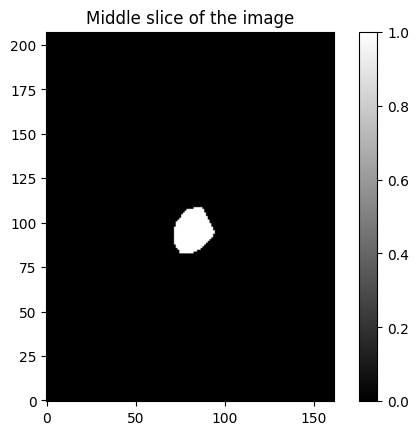

In [5]:
plot_image('/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_LAX/1685270/seg_la_2ch_ED.nii.gz')

In [45]:
import os, glob
for filename in glob.glob("/scratch-shared/abujalancegome/CMR_data/cmr_batch_*"):
    print(filename)
    os.remove(filename) 

Image shape: (156, 208, 11, 50)
Segmented image shape: (156, 208, 11, 50)


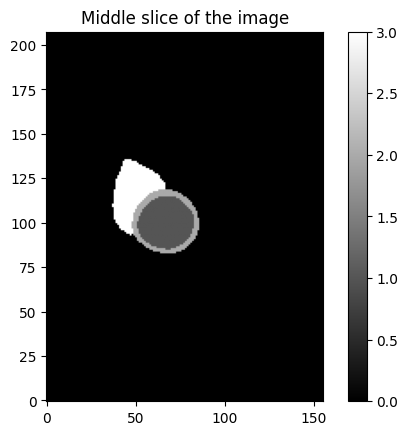

In [42]:
# Load the .nii.gz file
file_path = '/scratch-shared/abujalancegome/CMR_data/1288377/sa.nii.gz'
img = nib.load(file_path)

# Get the image data as a numpy array
data = img.get_fdata()

# Print the shape of the data
print("Image shape:", data.shape)

# Load the .nii.gz file
file_path = '/scratch-shared/abujalancegome/CMR_data/5999043/seg_sa.nii.gz'
img = nib.load(file_path)

# Get the image data as a numpy array
data = img.get_fdata()

# Print the shape of the data
print("Segmented image shape:", data.shape)

# Display a single slice of the image
# For 3D images, you need to select a slice along one of the axes
slice_index = data.shape[2] // 2  # Middle slice along the third axis
slice_data = data[:, :, 5, 0]

# Plot the slice
plt.imshow(slice_data.T, cmap='gray', origin='lower')
plt.title('Middle slice of the image')
plt.colorbar()
plt.show()

Image shape: (156, 208, 1)


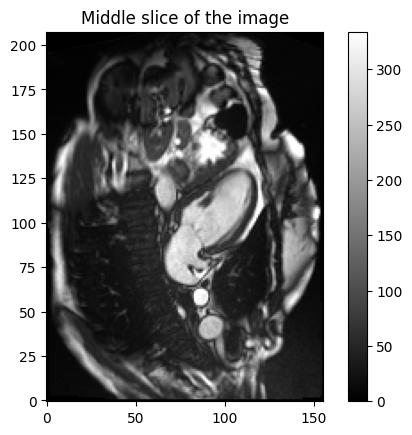

In [22]:
# Load the .nii.gz file
file_path = '/scratch-shared/abujalancegome/CMR_data/1287749/sa.nii.gz'
img = nib.load(file_path)

# Get the image data as a numpy array
data = img.get_fdata()

# Print the shape of the data
print("Image shape:", data.shape)

# Display a single slice of the image
# For 3D images, you need to select a slice along one of the axes
slice_index = data.shape[2] // 2  # Middle slice along the third axis
slice_data = data[:, :, slice_index]

# Plot the slice
plt.imshow(slice_data.T, cmap='gray', origin='lower')
plt.title('Middle slice of the image')
plt.colorbar()
plt.show()

Image shape: (162, 208, 1, 50)


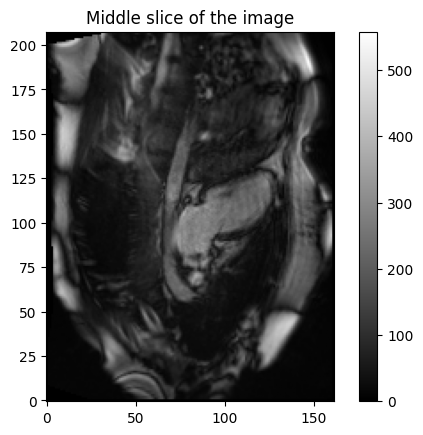

In [11]:
# Load the .nii.gz file
file_path = '/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_LAX/1685270/la_2ch.nii.gz'
img = nib.load(file_path)

# Get the image data as a numpy array
data = img.get_fdata()

# Print the shape of the data
print("Image shape:", data.shape)

# Display a single slice of the image
# For 3D images, you need to select a slice along one of the axes
slice_index = data.shape[2] // 2  # Middle slice along the third axis
slice_data = data[:, :, slice_index]

# Plot the slice
plt.imshow(slice_data[:,:, 45].T, cmap='gray', origin='lower')
plt.title('Middle slice of the image')
plt.colorbar()
plt.show()

Image shape: (162, 208, 1, 50)


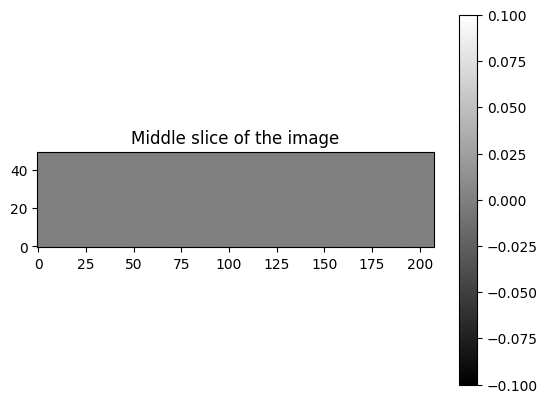

In [10]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Load the .nii.gz file
file_path = '/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_LAX/1685270/seg_la_2ch.nii.gz'
img = nib.load(file_path)

# Get the image data as a numpy array
data = img.get_fdata()

# Print the shape of the data
print("Image shape:", data.shape)

# Display a single slice of the image
# For 3D images, you need to select a slice along one of the axes
# Here, we select the middle slice along the third axis (depth)
slice_index = data.shape[2] // 2  # Middle slice along the third axis
slice_data = data[:, :, slice_index]

# Plot the slice
plt.imshow(slice_data.T[:,:,15], cmap='gray', origin='lower')
plt.title('Middle slice of the image')
plt.colorbar()
plt.show()


Image shape: (208, 162, 1, 50)
Image slice shape: (208, 162, 50)


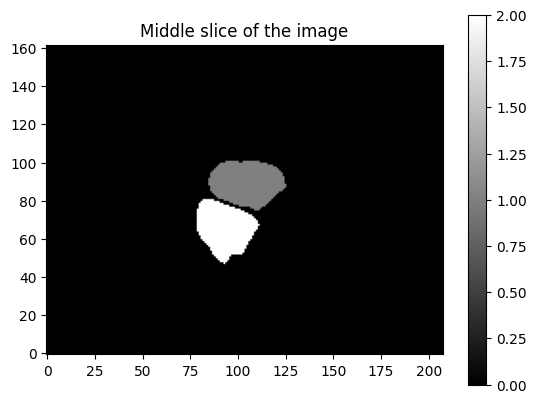

In [8]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Load the .nii.gz file
file_path = '/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_LAX/1685270/seg_la_4ch.nii.gz'
img = nib.load(file_path)

# Get the image data as a numpy array
data = img.get_fdata()

# Print the shape of the data
print("Image shape:", data.shape)

# Choose a middle slice along the correct axis
slice_index = data.shape[2] // 2  # Middle slice along the third axis
slice_data = data[:, :, slice_index]  # Extract the slice
print("Image slice shape:", slice_data.shape)


# Display the slice correctly
plt.imshow(slice_data[:,:,25].T, cmap='gray', origin='lower')  # Transpose to match expected orientation
plt.title('Middle slice of the image')
plt.colorbar()
plt.show()


Image shape: (192, 208, 9)
Image slice shape: (192, 208)


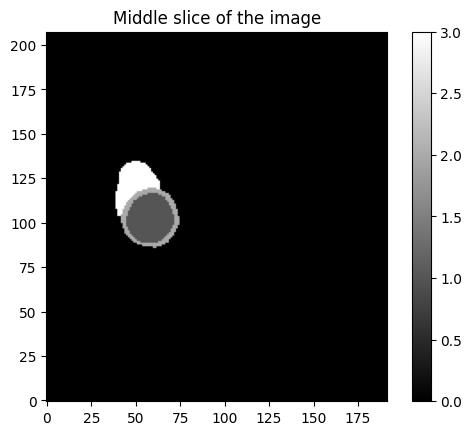

In [23]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Load the .nii.gz file
file_path = '/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_LAX/3636526/seg_sa_ED.nii.gz'
img = nib.load(file_path)

# Get the image data as a numpy array
data = img.get_fdata()

# Print the shape of the data
print("Image shape:", data.shape)

# Choose a middle slice along the correct axis
slice_index = data.shape[2] // 2  # Middle slice along the third axis
slice_data = data[:, :, 5]  # Extract the slice
print("Image slice shape:", slice_data.shape)


# Display the slice correctly
plt.imshow(slice_data.T, cmap='gray', origin='lower')  # Transpose to match expected orientation
plt.title('Middle slice of the image')
plt.colorbar()
plt.show()

Image shape: (208, 138, 1, 50)
Image slice shape: (208, 138, 1)


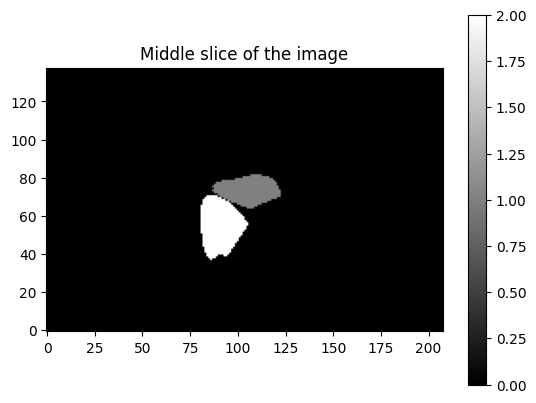

In [131]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Load the .nii.gz file
file_path = '/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_LAX/3692444/seg_la_4ch.nii.gz'
img = nib.load(file_path)

# Get the image data as a numpy array
data = img.get_fdata()

# Print the shape of the data
print("Image shape:", data.shape)

# Choose a middle slice along the correct axis
slice_index = data.shape[3] // 2  # Middle slice along the third axis
slice_data = data[:, :, :, slice_index]  # Extract the slice
print("Image slice shape:", slice_data.shape)


# Display the slice correctly
plt.imshow(slice_data.T[0, :,:], cmap='gray', origin='lower')  # Transpose to match expected orientation
plt.title('Middle slice of the image')
plt.colorbar()
plt.show()

Image shape: (192, 208, 11, 50)
<class 'numpy.ndarray'>
Image slice shape: (192, 208)


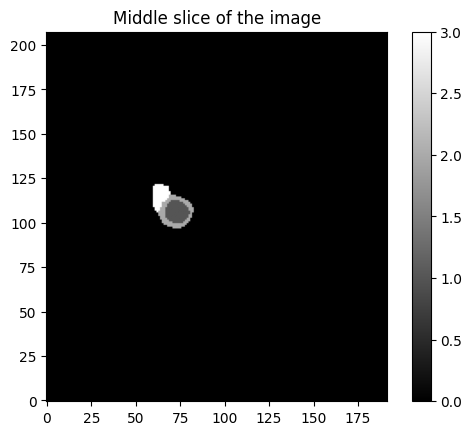

In [44]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Load the .nii.gz file
file_path = '/scratch-shared/abujalancegome/CMR_data/1000040/seg_sa.nii.gz'
img = nib.load(file_path)

# Get the image data as a numpy array
data = img.get_fdata()

# Print the shape of the data
print("Image shape:", data.shape)

# Choose a middle slice along the correct axis
slice_index = data.shape[2] // 2  # Middle slice along the third axis
slice_data = data[:, :, 10, 0]  # Extract the slice
print(type(slice_data))
print("Image slice shape:", slice_data.shape)


# Display the slice correctly
plt.imshow(slice_data.T[:, :], cmap='gray', origin='lower')  # Transpose to match expected orientation
plt.title('Middle slice of the image')
plt.colorbar()
plt.show()

(186, 208, 11, 50)
torch.Size([186, 208, 1, 50])
shape
torch.Size([210, 208, 1, 50])


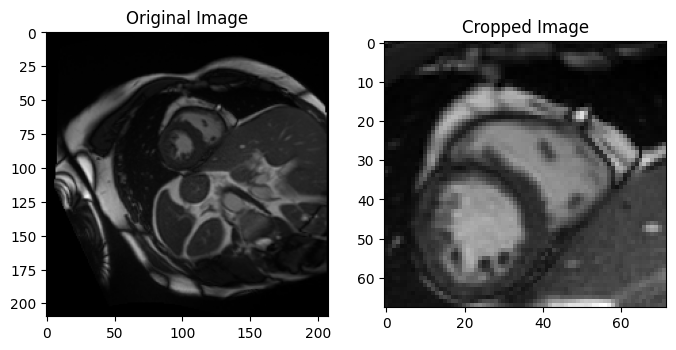

In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def get_bounding_box(image):
    """Finds the bounding box of the nonzero region in a 2D image."""
    nonzero_indices = torch.nonzero(image.squeeze())  # Remove singleton dim if present
    if nonzero_indices.shape[0] == 0:  # No white pixels found
        return None  
    min_y, min_x = nonzero_indices.min(dim=0)[0]
    max_y, max_x = nonzero_indices.max(dim=0)[0]
    return min_y.item(), max_y.item(), min_x.item(), max_x.item()

def crop_image(seg_tensor, orig_img):
    """
    Finds the max bounding box over all time slices and crops all slices accordingly.
    tensor: (T, H, C, W) -> A 4D tensor where T is time, H is height, C is channels, and W is width.
    """
    W, H, C, T = seg_tensor.shape  # Extract dimensions

    # Initialize max bounding box
    min_y, min_x = H, W
    max_y, max_x = 0, 0

    # Iterate over time slices to find the global bounding box
    for t in range(T):
        bbox = get_bounding_box(seg_tensor[:, :, 0, t])  # Squeeze out the channel dim
        if bbox:
            y1, y2, x1, x2 = bbox
            min_y, min_x = min(min_y, y1), min(min_x, x1)
            max_y, max_x = max(max_y, y2), max(max_x, x2)
    
    # Ensure the bounding box is valid
    if min_y >= max_y or min_x >= max_x:
        print("No white region detected in any slice.")
        return seg_tensor  # Return original tensor if no white region is found

    # Crop all slices using the max bounding box
    cropped_tensor = orig_img[min_y-10:max_y+10, min_x-10:max_x+10, :, :]
    return cropped_tensor

file_path = '/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_LAX/4609796/seg_sa.nii.gz'
img = nib.load(file_path)

# Get the image data as a numpy array
data = img.get_fdata()
print(data.shape)
_, _, c, _ = data.shape
tensor = torch.from_numpy(data[:, :, c // 2, :]).unsqueeze(2)
W, H, C, T = tensor.shape
print(tensor.shape)

# Load the .nii.gz file
file_path = '/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_LAX/4865907/sa.nii.gz'
img = nib.load(file_path)

# Get the image data as a numpy array
orig_img = img.get_fdata()
_, _, c, _ = orig_img.shape

orig_img = torch.from_numpy(orig_img[:, :, c // 2, :]).unsqueeze(2)
print("shape")
print(orig_img.shape)


# Crop conservatively
cropped_tensor = crop_image(tensor, orig_img)

# Plot an example before and after cropping
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(orig_img[:, :, :, 10], cmap='gray')
plt.title("Original Image")

# plt.subplot(1, 3, 2)
# plt.imshow(tensor[:, :, :, 25], cmap='gray')
# plt.title("Segmented Image")

plt.subplot(1, 2, 2)
slice_index = data.shape[3] // 2  # Middle slice along the temporal axis
plt.imshow(cropped_tensor[:, :, :, 49], cmap='gray')
plt.title("Cropped Image")

plt.show()


In [13]:
data_list =  ['1052287', '1214870', '1285515', '1685270', '1809025', '1811541', '1955539', '1960361', '1992086', '2017741', '2103667', '2104653', '2126811', '2213341', '2545270', '2640472', '2703378', '2959892', '2996101', '3267609', '3636526', '3644551', '3663187', '3692444', '3745052', '3962267', '4164892', '4178644', '4609796', '4691728', '4845376', '4865907', '5468180', '5648476', '5649382', '5731954', '5772667', '5786719', '5826230']

for idx in data_list:
    file_path = f'/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_toy/{idx}/seg_sa.nii.gz'
    img = nib.load(file_path)

    # Get the image data as a numpy array
    data = img.get_fdata()
    print(data.shape)
    tensor = torch.from_numpy(data[:, :, 5, :]).unsqueeze(2)
    W, H, C, T = tensor.shape
    print(tensor.shape)

    # Load the .nii.gz file
    file_path = f'/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_toy/{idx}/sa.nii.gz'
    img = nib.load(file_path)

    # Get the image data as a numpy array
    orig_img = img.get_fdata()
    orig_img = torch.from_numpy(orig_img[:, :, 5, :]).unsqueeze(2)
    print(orig_img.shape)


    # Crop conservatively
    cropped_tensor = crop_image(tensor, orig_img)

    slice_index = data.shape[3] // 2  # Middle slice along the third axis
    cropped_image = cropped_tensor[:, :, :, slice_index]
    torch.save(cropped_image, f'/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_toy/{idx}/cropped_tensor_{idx}.pt')


(198, 208, 11, 50)
torch.Size([198, 208, 1, 50])
torch.Size([198, 208, 1, 50])
(204, 208, 12, 50)
torch.Size([204, 208, 1, 50])
torch.Size([204, 208, 1, 50])
(210, 208, 11, 50)
torch.Size([210, 208, 1, 50])
torch.Size([210, 208, 1, 50])
(162, 208, 11, 50)
torch.Size([162, 208, 1, 50])
torch.Size([162, 208, 1, 50])
(186, 208, 12, 50)
torch.Size([186, 208, 1, 50])
torch.Size([186, 208, 1, 50])
(168, 208, 11, 50)
torch.Size([168, 208, 1, 50])
torch.Size([168, 208, 1, 50])
(186, 208, 11, 50)
torch.Size([186, 208, 1, 50])
torch.Size([186, 208, 1, 50])
(198, 208, 12, 50)
torch.Size([198, 208, 1, 50])
torch.Size([198, 208, 1, 50])
(174, 208, 11, 50)
torch.Size([174, 208, 1, 50])
torch.Size([174, 208, 1, 50])
(204, 208, 13, 50)
torch.Size([204, 208, 1, 50])
torch.Size([204, 208, 1, 50])
(210, 208, 11, 50)
torch.Size([210, 208, 1, 50])
torch.Size([210, 208, 1, 50])
(174, 208, 11, 50)
torch.Size([174, 208, 1, 50])
torch.Size([174, 208, 1, 50])
(162, 208, 11, 50)
torch.Size([162, 208, 1, 50])
tor

torch.Size([58, 63])


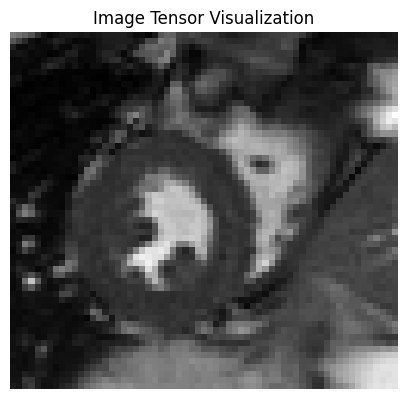

In [14]:
tensor = torch.load('/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_toy/1052287/cropped_tensor_1052287.pt').squeeze(2)#[:,:,25]
print(tensor.shape)

plt.figure(figsize=(5, 5))
plt.imshow(tensor, cmap='gray')
plt.axis('off')  # Hide the axis
plt.title('Image Tensor Visualization')
plt.show()

In [21]:
data_list =  ['1052287', '1214870', '1285515', '1685270', '1809025', '1811541', '1955539', '1960361', '1992086', '2017741',
              '2103667', '2104653', '2126811', '2213341', '2545270', '2640472', '2703378', '2959892', '2996101', '3267609',
              '3636526', '3644551', '3663187', '3692444', '3745052', '3962267', '4164892', '4178644', '4609796', '4691728',
              '4845376', '4865907', '5468180', '5648476', '5649382', '5731954', '5772667', '5786719', '5826230']

import torch
import torch.nn.functional as F

tensor_list = []

# Load tensors and determine the maximum size
max_height = 0
max_width = 0

for idx in data_list:
    file_path = f'/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_toy/{idx}/cropped_tensor_{idx}.pt'
    temp_tensor = torch.load(file_path).squeeze(2)
    tensor_list.append(temp_tensor)

    # Update maximum dimensions
    max_height = max(max_height, temp_tensor.size(0))
    max_width = max(max_width, temp_tensor.size(1))

# Zero-pad tensors to the maximum size with the image centered
padded_tensor_list = []
for tensor in tensor_list:
    pad_height = max_height - tensor.size(0)
    pad_width = max_width - tensor.size(1)

    # Calculate padding for each side
    pad_top = pad_height // 2
    pad_bottom = pad_height - pad_top
    pad_left = pad_width // 2
    pad_right = pad_width - pad_left

    # Pad the tensor
    padded_tensor = F.pad(tensor, (pad_left, pad_right, pad_top, pad_bottom))
    padded_tensor_list.append(padded_tensor)

# Stack the padded tensors
cmr_tensors = torch.stack(padded_tensor_list)

# Save the stacked tensors
torch.save(cmr_tensors, f'/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_toy/cmr_tensors.pt')




torch.Size([39, 77, 83])


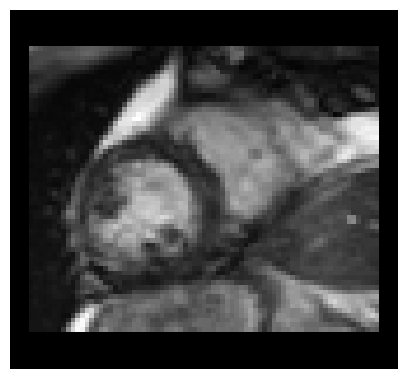

In [25]:
tensor = torch.load('/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_toy/cmr_tensors.pt')
print(tensor.shape)

plt.figure(figsize=(5, 5))
plt.imshow(tensor[2,:,:], cmap='gray')
plt.axis('off')  # Hide the axis
plt.title('')
plt.show()

Data shape: (186, 208, 12, 50)


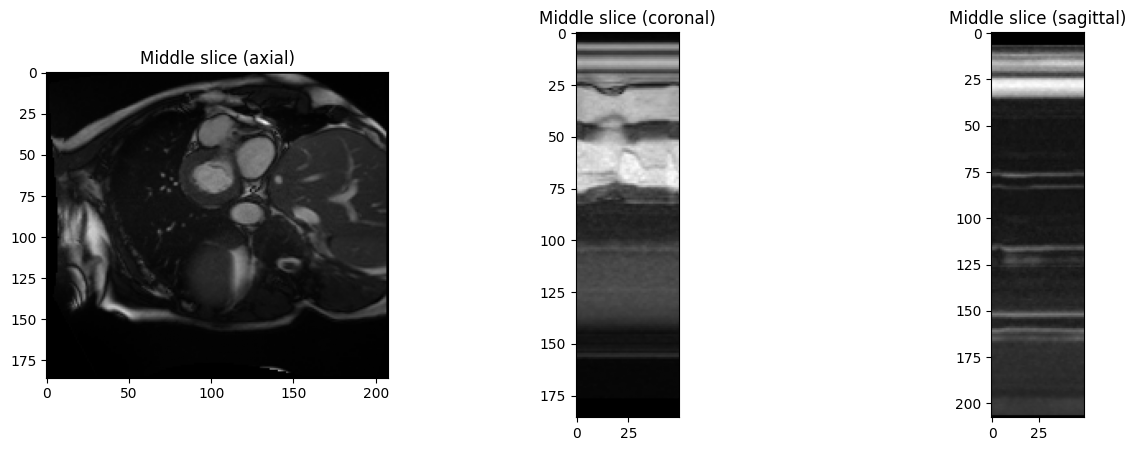

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (208, 186) to (208, 192) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video saved as SA_video_part2.mp4


In [50]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import imageio

# Load the NIfTI file
file_path = '/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_LAX/1809025/sa.nii.gz'

img = nib.load(file_path)
data = img.get_fdata()

# Get the shape of the data
print("Data shape:", data.shape)

# Visualize the middle slice of each dimension
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(data[:, :, 0, data.shape[3] // 2], cmap='gray')
axes[0].set_title('Middle slice (axial)')
axes[1].imshow(data[:, data.shape[1] // 2, 0, :], cmap='gray')
axes[1].set_title('Middle slice (coronal)')
axes[2].imshow(data[data.shape[0] // 2, :, 0, :], cmap='gray')
axes[2].set_title('Middle slice (sagittal)')
plt.show()

# Create a video from the slices
output_video_path = 'SA_video_part2.mp4'
writer = imageio.get_writer(output_video_path, fps=5)

# Assuming we want to create a video of the axial slices
for i in range(data.shape[3]):
    slice_img = data[:, :, 0, i]
    # Normalize the slice for better visualization
    slice_img = (slice_img - np.min(slice_img)) / (np.max(slice_img) - np.min(slice_img))
    slice_img = (slice_img * 255).astype(np.uint8)
    # Add a channel dimension
    slice_img = np.stack((slice_img,) * 3, axis=-1)
    writer.append_data(slice_img)

writer.close()
print(f"Video saved as {output_video_path}")


In [6]:
import torch
CMR_TRAIN_DIR='/projects/prjs1252/CL_data/CL_cmr_tensor_train.pt'
CMR_VAL_DIR='/projects/prjs1252/CL_data/CL_cmr_tensor_val.pt'
ECG_TRAIN_DIR='/projects/prjs1252/CL_data/CL_ECG_leads_train.pt'
ECG_VAL_DIR='/projects/prjs1252/CL_data/CL_ECG_leads_val.pt'
tensor = torch.load(ECG_VAL_DIR)
#/home/abujalancegome/deep_risk/ukbb_cardiac/dataset_toy/cmr_tensors.pt
print(tensor.shape)
tensor = tensor.permute(0, 2, 1, 3)
#tensor = tensor.unsqueeze(1)
print(tensor.dtype)
print(tensor.shape)

torch.save(tensor, ECG_VAL_DIR)

torch.Size([5130, 12, 1, 5000])
torch.float32
torch.Size([5130, 1, 12, 5000])
